In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [3]:
# Load stock price dataset (from a CSV file)
df = pd.read_csv("hour.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [6]:
df = df.set_index("instant")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])

## Exploratory Data Analysis (EDA)

### Check for Missing Values

In [11]:
# Check for missing values
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Summary Statistics

In [13]:
# Basic statistics
df.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


* temp and atemp are scaled between 0 and 1. They represent normalized temperature values.
* count (target variable) has a mean of around 189 rentals per hour.
* Wind speed (windspeed) has a low mean, suggesting calm conditions most of the time.
* Humidity has a mean of ~62%, indicating moderate humidity overall.

### Target Variable Distribution (count)

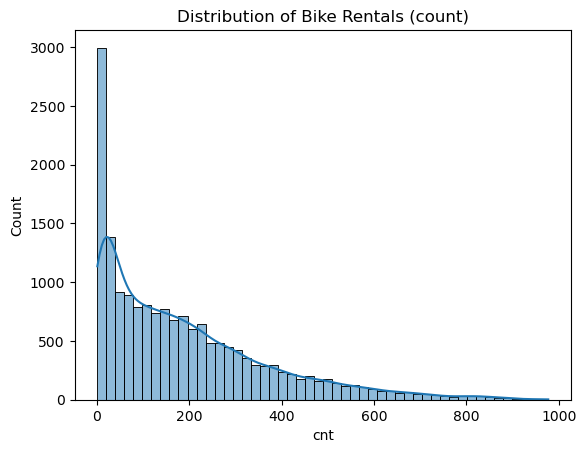

In [16]:
# Plot the distribution of the target variable
sns.histplot(df["cnt"], bins=50, kde=True)
plt.title("Distribution of Bike Rentals (count)")
plt.show()

* count is right-skewed, meaning there are more low-rental hours than high-rental ones.
* This suggests potential seasonality effects or specific peak hours.

### Time-based Trends

#### Hourly Trend

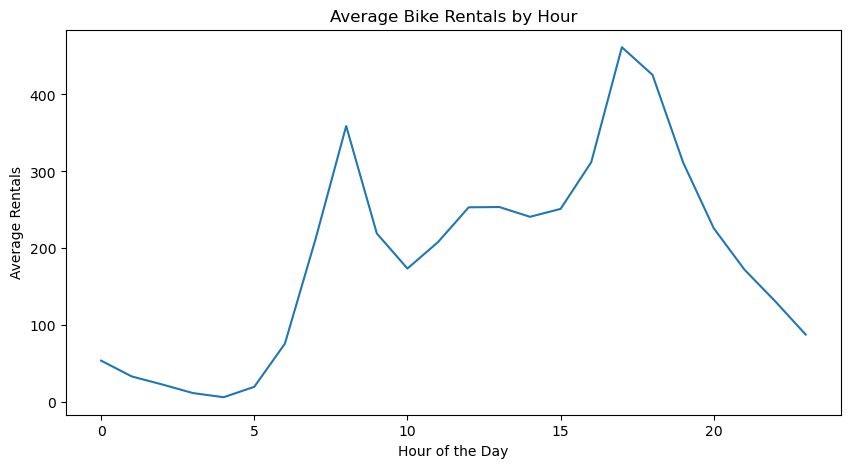

In [20]:
# Average rentals per hour
hourly_avg = df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rentals")
plt.title("Average Bike Rentals by Hour")
plt.show()

* Bike rentals peak at 8 AM and 5-6 PM, aligning with work commute hours.
* Lowest rentals occur between midnight and 5 AM.

#### Weekly Trend

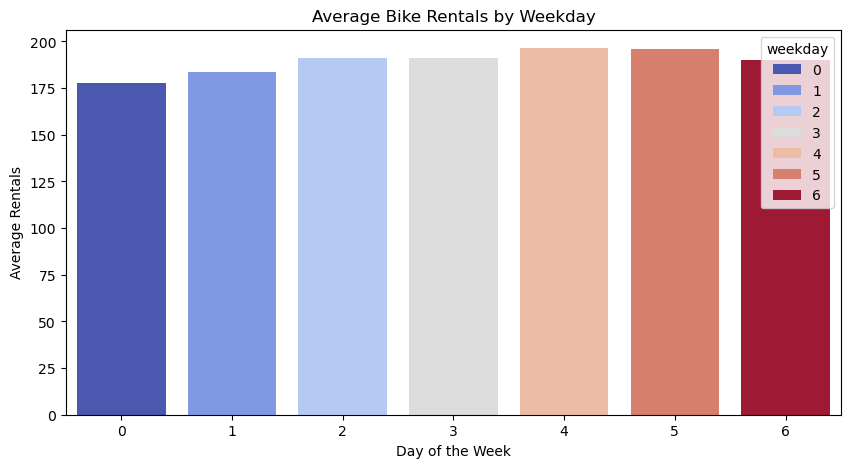

In [23]:
weekday_rentals = df.groupby('weekday')['cnt'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_rentals.index, y=weekday_rentals.values, hue = weekday_rentals.index, palette='coolwarm')
plt.title('Average Bike Rentals by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rentals')
plt.show()

* Weekday trends: The average number of bike rentals tends to be higher on weekdays compared to weekends, indicating strong usage by commuters likely traveling to work
* Weekend dip: There is a noticeable drop in rentals on weekends (Saturday and Sunday), suggesting that fewer people use the service for leisure or non-commute activities.
* Peak days: Certain weekdays, such as Tuesday and Thursday, might show slight peaks, reinforcing the idea of steady workweek usage — potentially linked to consistent commuting patterns.

#### Monthly Trend

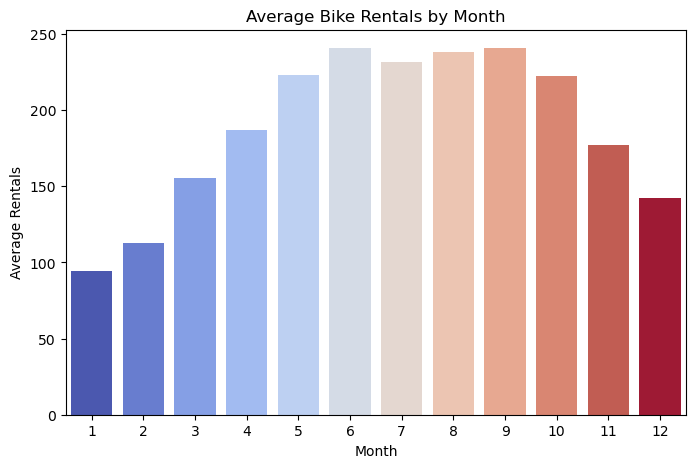

In [26]:
monthly_rentals = df.groupby("mnth")["cnt"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values, hue=monthly_rentals.index, palette="coolwarm", legend=False)
plt.title("Average Bike Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.show()

* Rentals peak in summer and fall (June to September).
* Lower in winter and spring — validates the impact of seasonal variation.

#### Seasonal Trend

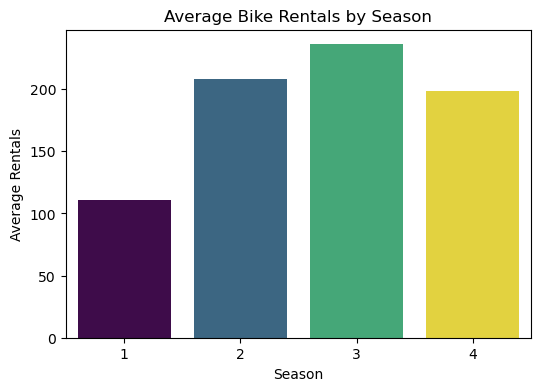

In [29]:
# Average rentals by season
season_avg = df.groupby("season")["cnt"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=season_avg.index, y=season_avg.values, hue=season_avg.index, palette="viridis", legend=False)
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.title("Average Bike Rentals by Season")
plt.show()

* Summer and fall see the highest bike rentals.
* Spring has the lowest rentals, possibly due to rain.

### Pivot table

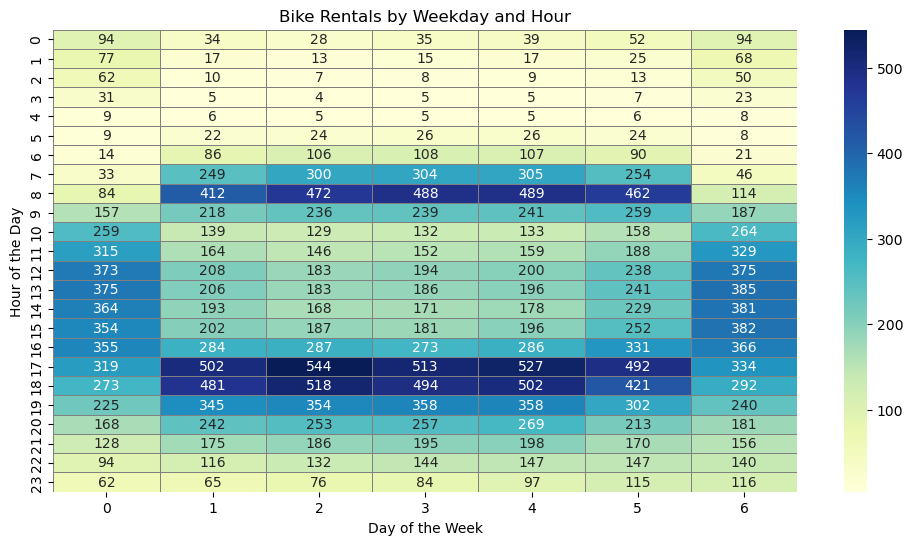

In [32]:
# Pivot table: average rentals by weekday and hour
pivot = df.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray', annot=True, fmt=".0f", cbar=True)
plt.title('Bike Rentals by Weekday and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

* Rush hour patterns: Are 8 AM and 6 PM peaks stronger on weekdays
* Weekend trends: Is midday busier for leisure rides on Saturdays/Sundays

### Feature Relationships

In [35]:
numerical_cols = ["temp", "atemp", "hum", "windspeed", "cnt"]

#### Pairwise Analysis (Scatterplots)

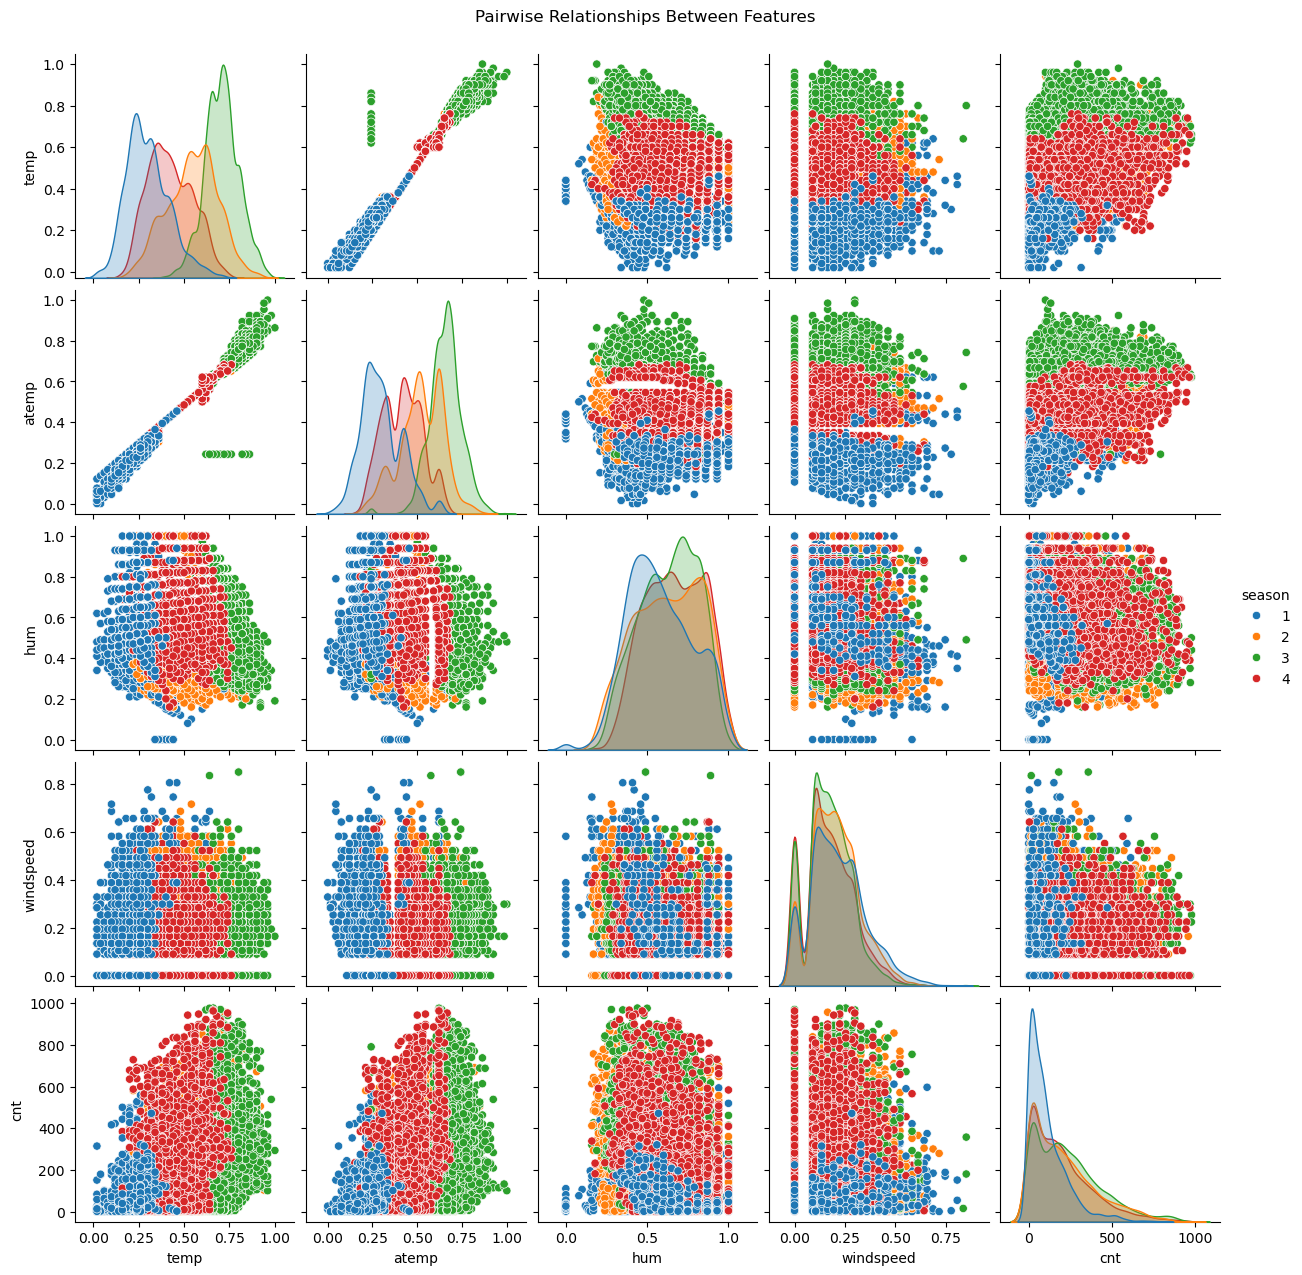

In [37]:
# Pairplots for numerical features
sns.pairplot(df[numerical_cols + ["season"]], hue="season", palette="tab10")
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

* temp vs. count: Strong positive correlation — rentals increase with temperature.
* humidity vs. count: A weak negative correlation — higher humidity may deter riders.
* windspeed: Very weak relationship with count, which might mean it’s not a crucial predictor.

### Feature Correlation

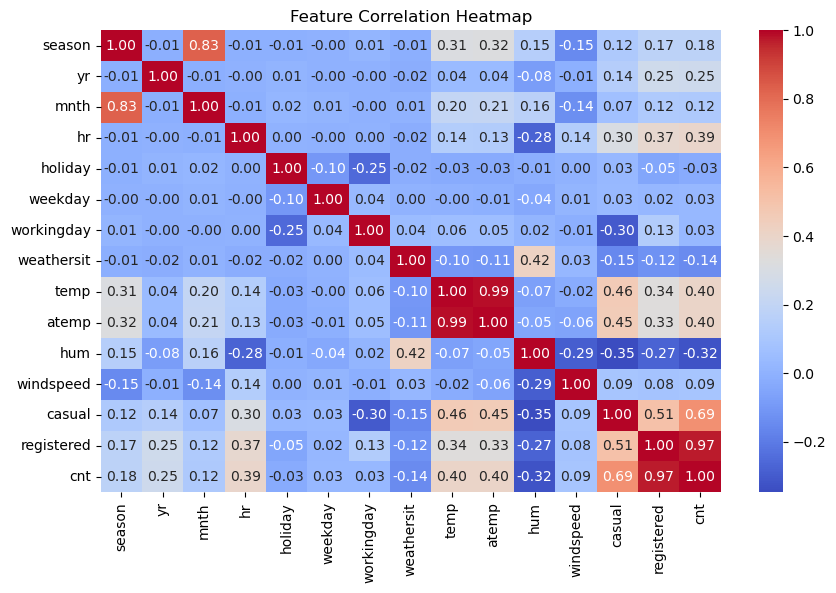

In [40]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

* temp and atemp are highly correlated (~0.99), so one of them might be redundant.
* humidity (-0.32): As humidity rises, fewer bikes are rented.
* windspeed (-0.13): Mild negative effect, but not as strong as humidity.
* Registered users drive the majority of bike rentals — the high 0.97 correlation shows that the total count depends heavily on registered users.
* Casual users have more variability — their weaker correlation (~0.67) suggests their usage might be more affected by weather, holidays, and weekends.
* count has a strong positive correlation with temp (0.39)
* windspeed has a weak correlation with count, meaning wind speed may not significantly affect bike rentals.

### Outlier Detection

#### Using Boxplots

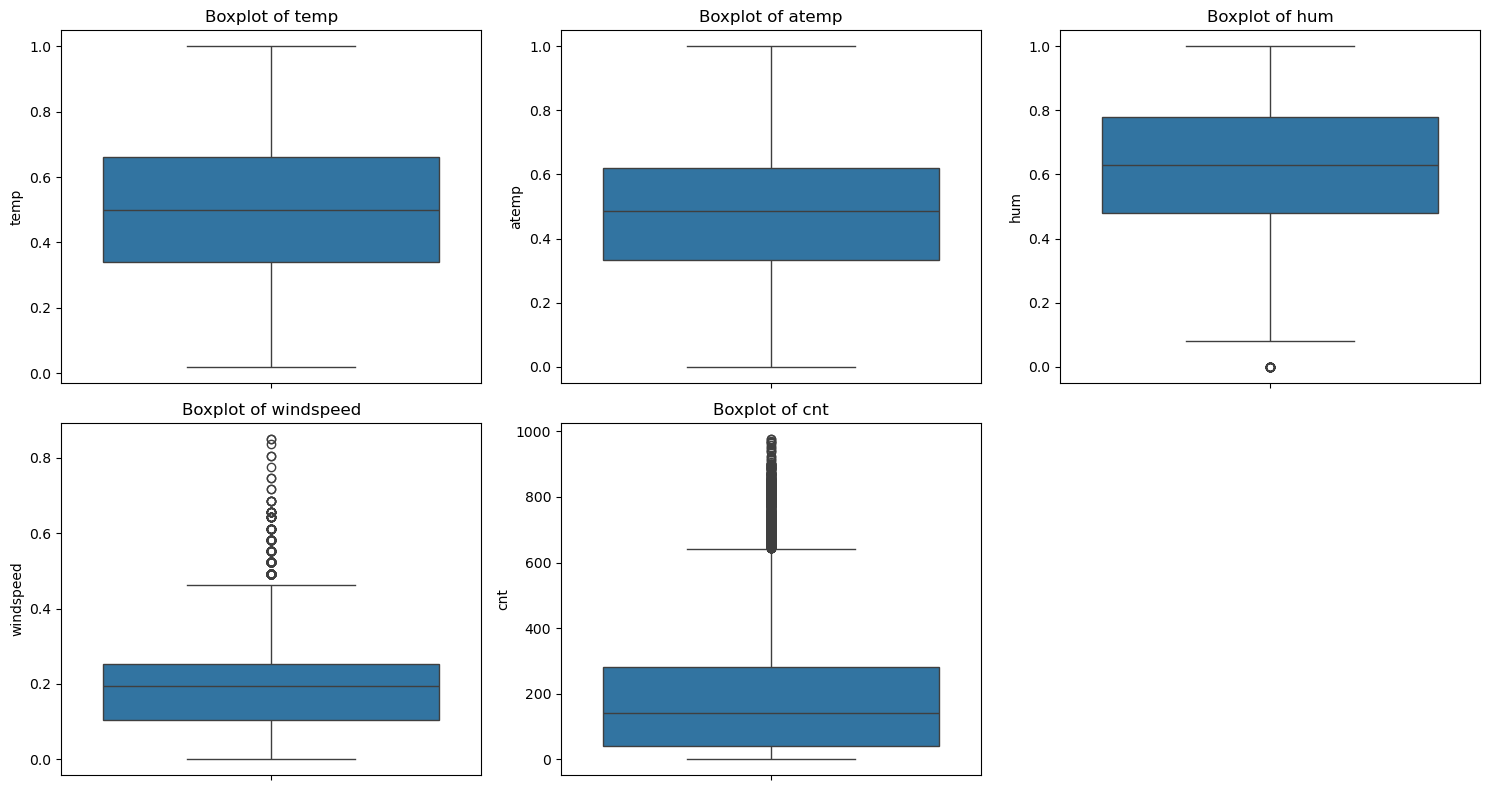

In [44]:
# Boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

* Count has extreme values (possibly due to weekends or special events).
* Windspeed shows several zero values — this could be sensor errors or calm wind conditions.

#### Z-score Outlier Detection

In [47]:
from scipy import stats

# Z-score to detect outliers
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers = (z_scores > 3).sum(axis=0)

print("Number of outliers per feature:")
print(pd.Series(outliers, index=numerical_cols))

Number of outliers per feature:
temp           0
atemp          1
hum           22
windspeed    107
cnt          244
dtype: int64


* Count has the most outliers.
* Consider using log transformation for the target variable.

### Aggregated rentals by hour and working day

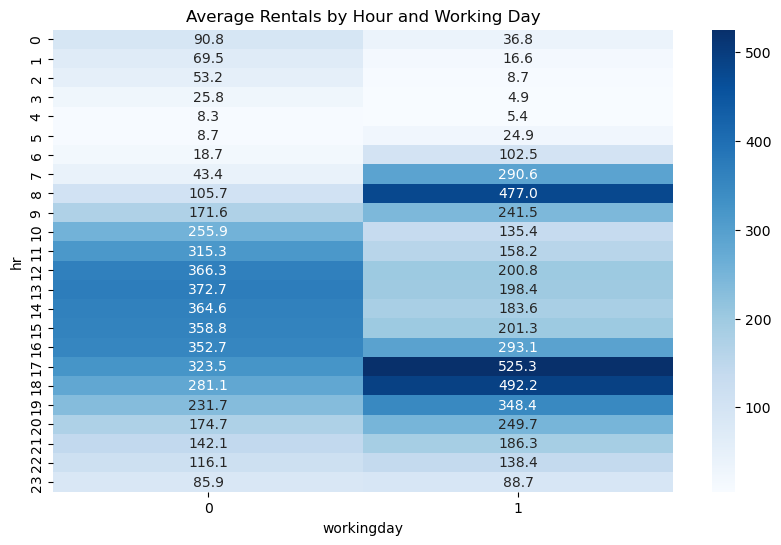

In [50]:
hourly_workday = df.groupby(["hr", "workingday"])["cnt"].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(hourly_workday, cmap="Blues", annot=True, fmt=".1f")
plt.title("Average Rentals by Hour and Working Day")
plt.show()

* Weekday trends: Peaks at 8 AM and 5 PM — typical commute hours.
* Weekend trends: More rentals during the afternoon, no sharp peaks.
* Suggests that working days strongly influence rental patterns.

### Time Series Decomposition

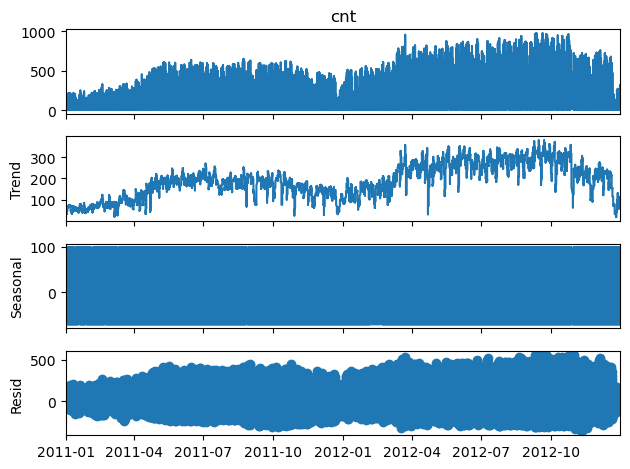

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set datetime index for time series analysis
df["dteday"] = pd.to_datetime(df["dteday"])
df.set_index("dteday", inplace=True)

# Decompose count into components
decompose = seasonal_decompose(df["cnt"], model="additive", period=24)
decompose.plot()
plt.show()

* Trend: Increasing over time — possibly due to the growing popularity of bike sharing.
* Seasonality: Clear daily and seasonal patterns.
* Residuals: Some noise, especially during extreme weather days.

### Categorical vs. Continuous Variables

#### Rentals by weekdays

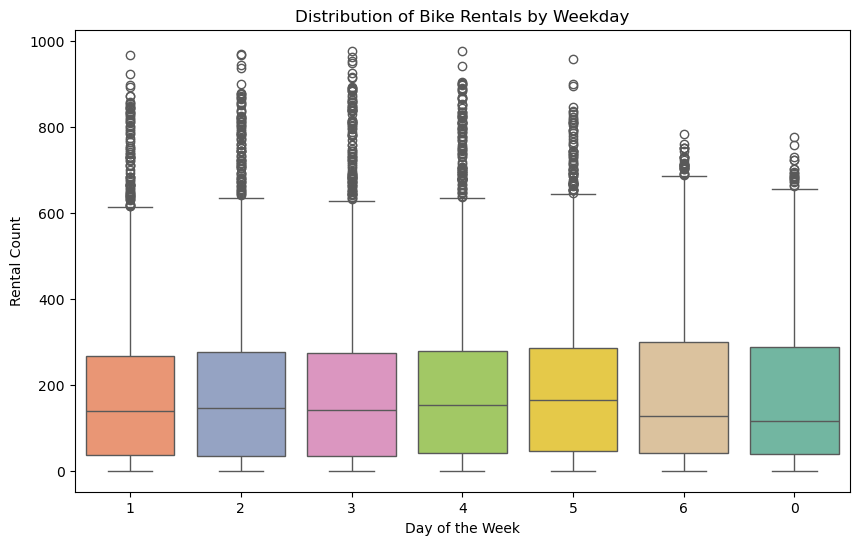

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', hue='weekday', data=df, palette='Set2', order=[
    1, 2, 3, 4, 5, 6, 0], legend=False)
plt.title('Distribution of Bike Rentals by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Rental Count')
plt.show()

* Shows if weekdays have tighter rental ranges (predictable work commutes).
* Wider spread on weekends — suggesting some outlier days with high activity.

#### Rentals by Season

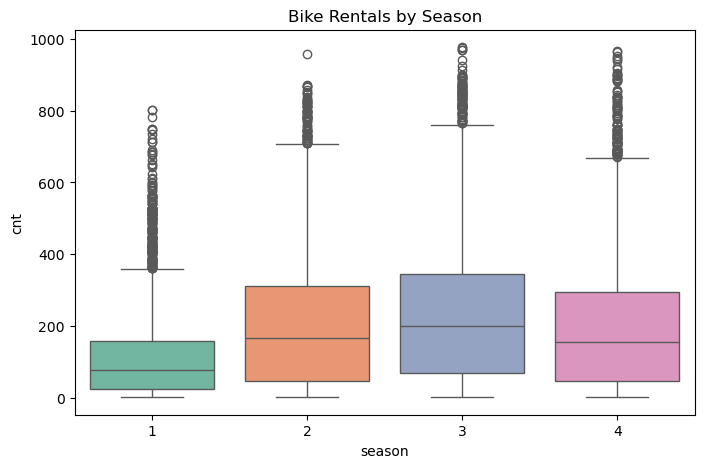

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="season", y="cnt", hue='season', data=df, palette="Set2", legend=False)
plt.title("Bike Rentals by Season")
plt.show()

* Fall and summer show the most rentals, suggesting better weather conditions.
* Spring lags behind, possibly due to rainy days.

#### Rentals by Weather Condition

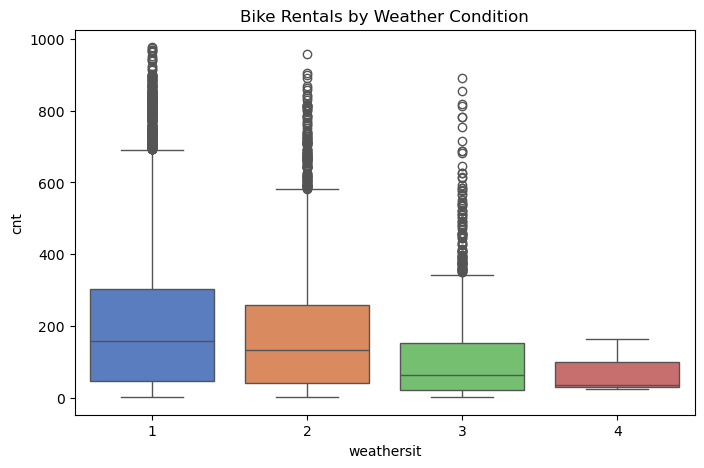

In [62]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="weathersit", y="cnt", hue='weathersit', data=df, palette="muted", legend=False)
plt.title("Bike Rentals by Weather Condition")
plt.show()

* Clear weather (1) sees the most rentals.
* Heavy rain/ice (4) has very few data points — could be rare events.
* Consider merging categories 3 and 4 to simplify modeling.

### Statistical Testing

In [65]:
from scipy.stats import ttest_ind

# Rentals on working days vs. holidays
workingday_counts = df[df["workingday"] == 1]["cnt"]
holiday_counts = df[df["holiday"] == 1]["cnt"]

# T-test
t_stat, p_val = ttest_ind(workingday_counts, holiday_counts, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 5.037507688042592
P-value: 6.374520762024759e-07


* p-value < 0.05 means there’s a statistically significant difference between working day and holiday rentals.
* Working days see more consistent demand — likely due to commuting patterns.

## Data Preprocessing

### Handle Outliers

In [69]:
# Capping outliers using the IQR method
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

In [70]:
df = cap_outliers(df, numerical_cols)

* SVMs rely on support vectors, and extreme outliers can shift decision boundaries.
* We clip extreme values without removing data to preserve information.

### Feature Scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

SVM with RBF kernels uses distance-based calculations — scaling ensures no feature dominates others.

## Feature EngEngineering 

### Time-based Feature

In [77]:
# Create a binary column for rush hours (7-9 AM, 5-7 PM)
df["rush_hour"] = df["hr"].apply(lambda x: 1 if (7 <= x <= 9 or 17 <= x <= 19) else 0)

* Capture commuting patterns: Bike rentals typically spike during morning (7–9 AM) and evening (5–7 PM) rush hours, reflecting work and school commutes.
* This binary feature helps the SVM model detect time-based trends without needing complex non-linear relationships, making it easier for the model to learn patterns.

###  Weather Interactions

In [80]:
# Interaction between temperature and humidity 
df["temp_humidity"] = df["temp"] * df["hum"]

Combines the effect of temperature + humidity (hot and humid days may deter riders).

In [82]:
# Interaction between season and weather
df["season_weather"] = df["season"] * df["weathersit"]

Season + weather interaction may highlight days when bad weather aligns with seasonal shifts.m

### Riders Ratio

In [85]:
# Add a small constant to prevent division by zero
epsilon = 1e-6
df['casual_ratio'] = df['casual'] / (df['cnt'] + epsilon)
df['registered_ratio'] = df['registered'] / (df['cnt'] + epsilon)

These ratios help the model spot if the spike in rentals comes more from occasional users (weekends, holidays) or frequent users (weekdays, workdays).

### Lag Features (for time series patterns)

In [88]:
df = df.sort_values(by=["dteday", "hr"])

# Lag features
df["lag_1"] = df["cnt"].shift(1).fillna(0)
df["lag_2"] = df["cnt"].shift(2).fillna(0)

* Autoregressive patterns — current rentals are often related to the previous hour’s rentals.
* Helps SVM detect temporal dependencies.

### Encoding Categorical Features

#### One-hot Encoding

In [92]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode season, weather, holiday, workingday
categorical_cols = ["season", "weathersit"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

* Works well for SVM as it doesn’t assume an ordinal relationship between categories.
* Seasonality effects in bike rentals can be non-linear — like sudden drops in Winter — which one-hot encoding can capture more easily.
* drop_first=True avoids multicollinearity by removing one category per feature.

#### Cyclical Encoding

In [95]:
# For hour (0-23): 24 hours in a day
df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)

# For month (1-12): 12 months in a year. Shift by 1 so that January (1) maps correctly.
df['month_sin'] = np.sin(2 * np.pi * (df['mnth']-1) / 12)
df['month_cos'] = np.cos(2 * np.pi * (df['mnth']-1) / 12)

# For weekday (0-6): 7 days in a week
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

For time features that are cyclic (like hour, month, and weekday), it can be beneficial to encode them using sine and cosine transforms. This way, you express the cyclical relationship

### Polynomial Features

In [98]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[["temp", "hum", "windspeed"]])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(["temp", "hum", "windspeed"]))

df = pd.concat([df.reset_index(drop=True), poly_df], axis=1)

Polynomials add interactions and squared terms, letting SVM capture more complex relationships.

### Removing Features

In [102]:
# Drop columns we don't need for modeling
df = df.drop(columns=["atemp", "mnth","hr","casual","registered"])

### Finalizing the Preprocessed Data

In [104]:
final_features = list(set(df.columns))
final_features

['workingday',
 'lag_1',
 'temp windspeed',
 'temp^2',
 'hour_cos',
 'weathersit_2',
 'hum',
 'windspeed^2',
 'temp',
 'hour_sin',
 'month_sin',
 'season_weather',
 'holiday',
 'yr',
 'season_3',
 'casual_ratio',
 'month_cos',
 'weekday_cos',
 'lag_2',
 'temp hum',
 'hum windspeed',
 'weekday',
 'hum^2',
 'season_4',
 'season_2',
 'rush_hour',
 'weathersit_3',
 'weekday_sin',
 'windspeed',
 'registered_ratio',
 'temp_humidity',
 'weathersit_4',
 'cnt']

### Prepare data

In [106]:
X = df[final_features].drop(columns=['cnt'], errors='ignore')  # remove target if present
y = df['cnt']

### Train-test split

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling

In [110]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Traing

In [112]:
from sklearn.svm import SVR

# Train SVM model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

## Evaluation

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.00
R-squared: 0.93


## Visualize the Model’s Predictions

### Actual vs. Predicted values

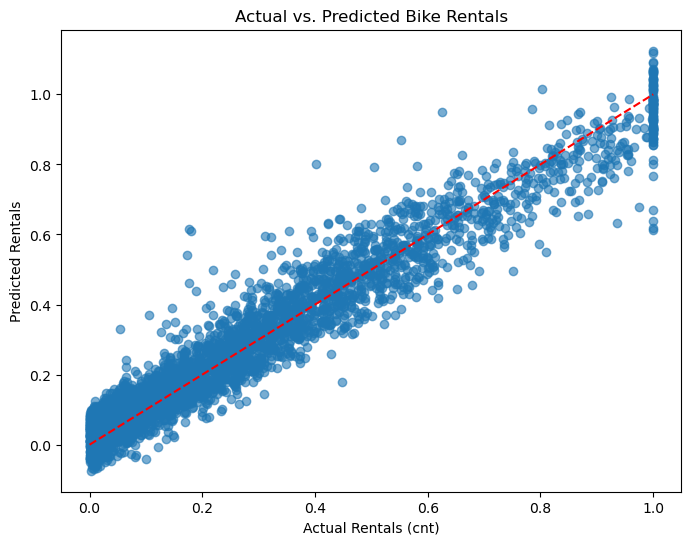

In [117]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs. Predicted Bike Rentals')
plt.xlabel('Actual Rentals (cnt)')
plt.ylabel('Predicted Rentals')
plt.show()

The points are clustered around the red 45° line it's approximately perfect predictions.

### Residual plot

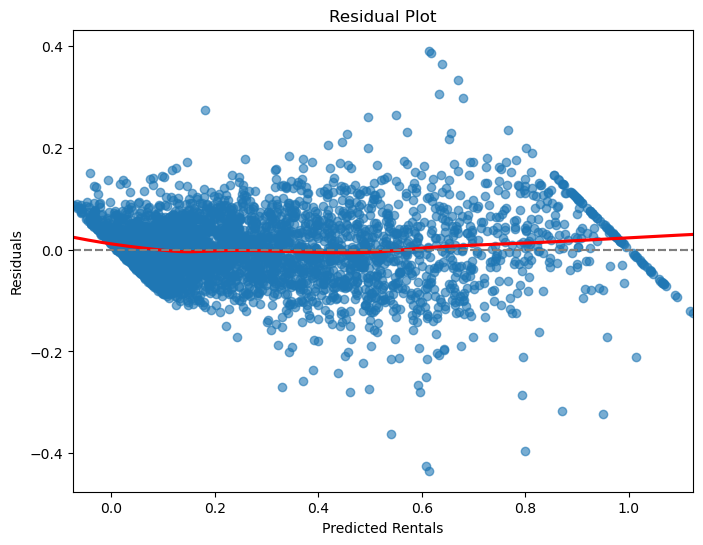

In [120]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Rentals')
plt.ylabel('Residuals')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

The model is well-fitted, residuals are most of them are randomly scattered around 0.

### Distribution of Residuals

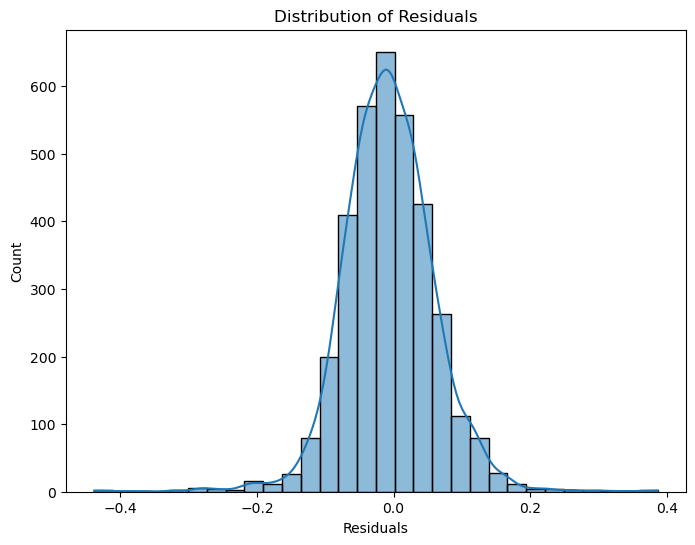

In [123]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

Errors following a normal distribution.